# Sparse Gaussian Process 

In [1]:
import matplotlib as mpl; mpl.use('pgf')

In [2]:
%matplotlib inline

In [3]:
import numpy as np

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

# import tensorflow as tf
import tensorflow_probability as tfp

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from collections import defaultdict

from matplotlib import animation
from IPython.display import HTML
from etudes.gaussian_processes import gp_sample_custom, dataframe_from_gp_samples

Instructions for updating:
non-resource variables are not supported in the long term


In [4]:
golden_ratio = 0.5 * (1 + np.sqrt(5))
golden_size = lambda width: (width, width / golden_ratio)

In [5]:
width = 10

rc = {
    "figure.figsize": golden_size(width),
    "text.usetex": True,
}

sns.set(context="notebook", style="ticks", palette="colorblind", font="serif", rc=rc)

In [6]:
# shortcuts
tfd = tfp.distributions
kernels = tfp.math.psd_kernels

# constants
n_train = 500
observation_noise_variance = 1e-1

n_features = 1 # dimensionality
n_index_points = 256 # nbr of index points

n_samples = 8 # nbr of GP prior samples
jitter = 1e-2
kernel_cls = kernels.ExponentiatedQuadratic

n_inducing_points = 20
n_epochs = 2000
batch_size = 50

seed = 42 # set random seed for reproducibility
random_state = np.random.RandomState(seed)

x_min, x_max = -1.0, 1.0
y_min, y_max = -3.0, 3.0
x_loc = -0.5
# index points
X_q = np.linspace(x_min, x_max, n_index_points).reshape(-1, n_features)

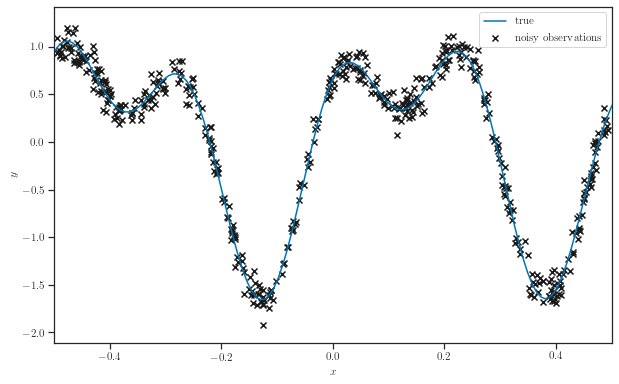

In [7]:
f = lambda x: np.sin(12.0*x) + 0.66*np.cos(25.0*x)

X = x_loc + random_state.rand(n_train, n_features) 
eps = observation_noise_variance * random_state.randn(n_train, n_features)
Y = np.squeeze(f(X) + eps)

fig, ax = plt.subplots()

ax.plot(X_q, f(X_q), label="true")
ax.scatter(X, Y, marker='x', color='k', label="noisy observations")

ax.legend()

ax.set_xlim(x_loc, -x_loc)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

plt.show()

In [8]:
# amplitude = tf.exp(tf.Variable(np.float64(0)), name='amplitude')
# length_scale = tf.exp(tf.Variable(np.float64(-1)), name='length_scale')
# observation_noise_variance = tf.exp(tf.Variable(np.float64(-5)), name='observation_noise_variance')
# kernel = kernel_cls(amplitude=amplitude, length_scale=length_scale)
# gp = tfd.GaussianProcess(
#     kernel=kernel,
#     index_points=X,
#     observation_noise_variance=observation_noise_variance
# )

In [9]:
# nll = - gp.log_prob(Y)
# nll

In [10]:
# optimizer = tf.train.AdamOptimizer(learning_rate=.05, beta1=.5, beta2=.99)
# optimize = optimizer.minimize(nll)

In [11]:
# history = defaultdict(list)

# with tf.Session() as sess:

#     sess.run(tf.global_variables_initializer())

#     for i in range(500):
#         (_, nll_value, amplitude_value, length_scale_value, 
#          observation_noise_variance_value) = sess.run([optimize, nll, amplitude, length_scale, observation_noise_variance])
#         history["nll"].append(nll_value)
#         history["amplitude"].append(amplitude_value)
#         history["length_scale"].append(length_scale_value)
#         history["observation_noise_variance"].append(observation_noise_variance_value)

In [12]:
# fig, ax = plt.subplots()

# sns.lineplot(x='amplitude', y='length_scale', 
#              sort=False, data=pd.DataFrame(history), alpha=0.8, ax=ax)

# ax.set_xlabel(r"amplitude $\sigma$")
# ax.set_ylabel(r"lengthscale $\ell$")

# plt.show()

In [13]:
# kernel_history = kernel_cls(amplitude=history.get("amplitude"), length_scale=history.get("length_scale"))
# gprm_history = tfd.GaussianProcessRegressionModel(
#     kernel=kernel_history, index_points=X_q, observation_index_points=X, observations=Y,
#     observation_noise_variance=history.get("observation_noise_variance"), jitter=jitter
# )
# gprm_mean = gprm_history.mean()
# gprm_stddev = gprm_history.stddev()

In [14]:
# with tf.Session() as sess:
#     gprm_mean_value, gprm_stddev_value = sess.run([gprm_mean, gprm_stddev])

In [15]:
# fig, ax = plt.subplots()

# ax.plot(X_q, gprm_mean_value[0])
# ax.fill_between(np.squeeze(X_q), 
#                 gprm_mean_value[0] - 2*gprm_stddev_value[0], 
#                 gprm_mean_value[0] + 2*gprm_stddev_value[0], alpha=0.1)

# ax.scatter(X, Y, marker='x', color='k', label="noisy observations")

# ax.set_xlabel('$x$')
# ax.set_ylabel('$y$')
# ax.set_ylim(y_min, y_max)

# plt.show()

In [16]:
# fig, ax = plt.subplots()

# ax.plot(X_q, gprm_mean_value[-1])
# ax.fill_between(np.squeeze(X_q), 
#                 gprm_mean_value[-1] - 2*gprm_stddev_value[-1], 
#                 gprm_mean_value[-1] + 2*gprm_stddev_value[-1], alpha=0.1)

# ax.scatter(X, Y, marker='x', color='k', label="noisy observations")

# ax.set_xlabel('$x$')
# ax.set_ylabel('$y$')
# ax.set_ylim(y_min, y_max)

# plt.show()

In [17]:
amplitude = tf.exp(tf.Variable(np.float64(0)), name='amplitude')
length_scale = tf.exp(tf.Variable(np.float64(-1)), name='length_scale')
observation_noise_variance = tf.exp(tf.Variable(np.float64(-5)), name='observation_noise_variance')
kernel = kernel_cls(amplitude=amplitude, length_scale=length_scale)

In [18]:
inducing_index_points_initial = random_state.choice(X.squeeze(), n_inducing_points).reshape(-1, n_features)
inducing_index_points_initial.shape

(20, 1)

In [19]:
# bijector = tfp.bijectors.Chain([tfp.bijectors.CholeskyOuterProduct(), 
#                                 ])
# bijector

In [20]:
n_inducing_points = 20

In [21]:
inducing_index_points = tf.Variable(inducing_index_points_initial, 
                                    name='inducing_index_points')

# variational_inducing_observations_loc = tf.Variable(np.zeros(n_inducing_points), 
#                                                     name='variational_inducing_observations_loc')
# variational_inducing_observations_scale = tf.Variable(
#     np.eye(n_inducing_points), name='variational_inducing_observations_scale')

# variational_inducing_observations_scale = tfp.util.TransformedVariable(
#     np.eye(n_inducing_points), tfp.bijectors.FillTriangular(), name='variational_inducing_observations_scale'
# )

# variational_inducing_observations_scale_flat = tf.Variable(
#     random_state.rand(n_inducing_points * (n_inducing_points + 1) // 2),
#     name='variational_inducing_observations_scale_flat')
# variational_inducing_observations_scale = tfp.math.fill_triangular(variational_inducing_observations_scale_flat)

In [22]:
[variational_inducing_observations_loc, 
 variational_inducing_observations_scale] = tfd.VariationalGaussianProcess.optimal_variational_posterior(
    kernel=kernel,
    inducing_index_points=inducing_index_points,
    observation_index_points=X,
    observations=Y,
    observation_noise_variance=observation_noise_variance
)

In [23]:
vgp = tfd.VariationalGaussianProcess(
    kernel=kernel,
    index_points=X_q,
    inducing_index_points=inducing_index_points,
    variational_inducing_observations_loc=variational_inducing_observations_loc,
    variational_inducing_observations_scale=variational_inducing_observations_scale,
    observation_noise_variance=observation_noise_variance,
    jitter=jitter
)

In [24]:
dataset = tf.data.Dataset.from_tensor_slices((X, Y)) \
                         .shuffle(buffer_size=500) \
                         .batch(batch_size, drop_remainder=True)
iterator = tf.data.make_initializable_iterator(dataset)
X_batch, Y_batch = iterator.get_next()
X_batch, Y_batch

(<tf.Tensor 'IteratorGetNext:0' shape=(50, 1) dtype=float64>,
 <tf.Tensor 'IteratorGetNext:1' shape=(50,) dtype=float64>)

In [25]:
nelbo = vgp.variational_loss(
    observations=Y_batch,
    observation_index_points=X_batch,
    kl_weight=batch_size/n_train
)

In [26]:
optimizer = tf.train.AdamOptimizer()
optimize = optimizer.minimize(nelbo)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [27]:
steps_per_epoch = n_train // batch_size
steps_per_epoch

10

In [28]:
n_epochs = 100

In [29]:
jitter = 1e-8

In [44]:
Kxx = kernel.matrix(X, X)
Kxx

<tf.Tensor 'ExponentiatedQuadratic_5/ExponentiatedQuadratic/ExponentiatedQuadratic/ExponentiatedQuadratic/ExponentiatedQuadratic/ExponentiatedQuadratic/Exp:0' shape=(500, 500) dtype=float64>

In [45]:
Kzz = kernel.matrix(inducing_index_points, inducing_index_points)
Kzz

<tf.Tensor 'ExponentiatedQuadratic_6/ExponentiatedQuadratic/ExponentiatedQuadratic/ExponentiatedQuadratic/ExponentiatedQuadratic/ExponentiatedQuadratic/Exp:0' shape=(20, 20) dtype=float64>

In [43]:
with tf.Session() as sess:

    sess.run(tf.global_variables_initializer())

    print(sess.run(tf.linalg.cholesky(Kzz)))
# #     print(sess.run(tf.linalg.cholesky(tfd.variational_gaussian_process._add_diagonal_shift(Kzz, jitter))))

InvalidArgumentError: 2 root error(s) found.
  (0) Invalid argument: Cholesky decomposition was not successful. The input might not be valid.
	 [[node Cholesky_2 (defined at /usr/local/lib/python3.6/dist-packages/tensorflow_core/python/framework/ops.py:1748) ]]
	 [[Cholesky_2/_1]]
  (1) Invalid argument: Cholesky decomposition was not successful. The input might not be valid.
	 [[node Cholesky_2 (defined at /usr/local/lib/python3.6/dist-packages/tensorflow_core/python/framework/ops.py:1748) ]]
0 successful operations.
0 derived errors ignored.

Original stack trace for 'Cholesky_2':
  File "/usr/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.6/dist-packages/traitlets/config/application.py", line 664, in launch_instance
    app.start()
  File "/usr/local/lib/python3.6/dist-packages/ipykernel/kernelapp.py", line 563, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.6/dist-packages/tornado/platform/asyncio.py", line 148, in start
    self.asyncio_loop.run_forever()
  File "/usr/lib/python3.6/asyncio/base_events.py", line 438, in run_forever
    self._run_once()
  File "/usr/lib/python3.6/asyncio/base_events.py", line 1451, in _run_once
    handle._run()
  File "/usr/lib/python3.6/asyncio/events.py", line 145, in _run
    self._callback(*self._args)
  File "/usr/local/lib/python3.6/dist-packages/tornado/ioloop.py", line 690, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "/usr/local/lib/python3.6/dist-packages/tornado/ioloop.py", line 743, in _run_callback
    ret = callback()
  File "/usr/local/lib/python3.6/dist-packages/tornado/gen.py", line 787, in inner
    self.run()
  File "/usr/local/lib/python3.6/dist-packages/tornado/gen.py", line 748, in run
    yielded = self.gen.send(value)
  File "/usr/local/lib/python3.6/dist-packages/ipykernel/kernelbase.py", line 361, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "/usr/local/lib/python3.6/dist-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/usr/local/lib/python3.6/dist-packages/ipykernel/kernelbase.py", line 268, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "/usr/local/lib/python3.6/dist-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/usr/local/lib/python3.6/dist-packages/ipykernel/kernelbase.py", line 541, in execute_request
    user_expressions, allow_stdin,
  File "/usr/local/lib/python3.6/dist-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/usr/local/lib/python3.6/dist-packages/ipykernel/ipkernel.py", line 300, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/usr/local/lib/python3.6/dist-packages/ipykernel/zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 2855, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 2881, in _run_cell
    return runner(coro)
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/async_helpers.py", line 68, in _pseudo_sync_runner
    coro.send(None)
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 3058, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 3249, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-43-5ad0a644bf74>", line 5, in <module>
    print(sess.run(tf.linalg.cholesky(Kzz)))
  File "/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/ops/gen_linalg_ops.py", line 820, in cholesky
    "Cholesky", input=input, name=name)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/framework/op_def_library.py", line 794, in _apply_op_helper
    op_def=op_def)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/util/deprecation.py", line 507, in new_func
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/framework/ops.py", line 3357, in create_op
    attrs, op_def, compute_device)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/framework/ops.py", line 3426, in _create_op_internal
    op_def=op_def)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/framework/ops.py", line 1748, in __init__
    self._traceback = tf_stack.extract_stack()


In [36]:
history = defaultdict(list)

with tf.Session() as sess:

    sess.run(tf.global_variables_initializer())

    for i in range(n_epochs):

        sess.run(iterator.initializer)
        
        for j in range(steps_per_epoch):

#             sess.run(optimize)
            (_, nelbo_value, 
             amplitude_value, 
             length_scale_value,
             observation_noise_variance_value,
             inducing_index_points_value,
             variational_inducing_observations_loc_value,
             variational_inducing_observations_scale_value) = sess.run([optimize, 
                                                                        nelbo, 
                                                                        amplitude, 
                                                                        length_scale, 
                                                                        observation_noise_variance,
                                                                        inducing_index_points,
                                                                        variational_inducing_observations_loc, 
                                                                        variational_inducing_observations_scale])

        history["nelbo"].append(nelbo_value)
        history["amplitude"].append(amplitude_value)
        history["length_scale"].append(length_scale_value)
        history["observation_noise_variance"].append(observation_noise_variance_value)
        history["inducing_index_points"].append(inducing_index_points_value)
        history["variational_inducing_observations_loc"].append(variational_inducing_observations_loc_value)
        history["variational_inducing_observations_scale"].append(variational_inducing_observations_scale_value)

In [37]:
inducing_index_points_history = np.stack(history["inducing_index_points"])
inducing_index_points_history.shape

(100, 20, 1)

In [38]:
segments_min_history = np.dstack(np.broadcast_arrays(inducing_index_points_history, y_min))
segments_max_history = np.dstack([inducing_index_points_history, 
                                  history["variational_inducing_observations_loc"]])

In [39]:
segments_history = np.stack([segments_max_history, segments_min_history], axis=-2)
segments_history.shape

(100, 20, 2, 2)

In [40]:
kernel_history = kernel_cls(amplitude=history.get("amplitude"), length_scale=history.get("length_scale"))

vgp_history = tfd.VariationalGaussianProcess(
    kernel=kernel_history,
    index_points=X_q,
    inducing_index_points=np.stack(history.get("inducing_index_points")),
    variational_inducing_observations_loc=np.stack(history.get("variational_inducing_observations_loc")),
    variational_inducing_observations_scale=np.stack(history.get("variational_inducing_observations_scale")),
    observation_noise_variance=history.get("observation_noise_variance")
)
vgp_mean = vgp_history.mean()
vgp_stddev = vgp_history.stddev()

In [ ]:
with tf.Session() as sess:
    vgp_mean_value, vgp_stddev_value = sess.run([vgp_mean[::10], vgp_stddev[::10]])

In [ ]:
fig, ax = plt.subplots()

ax.plot(X_q, gprm_mean_value[-1])
ax.fill_between(np.squeeze(X_q), 
                gprm_mean_value[-1] - 2*gprm_stddev_value[-1], 
                gprm_mean_value[-1] + 2*gprm_stddev_value[-1], alpha=0.1)

ax.plot(X_q, vgp_mean_value[-1])
ax.fill_between(np.squeeze(X_q), 
                vgp_mean_value[-1] - 2*vgp_stddev_value[-1], 
                vgp_mean_value[-1] + 2*vgp_stddev_value[-1], alpha=0.1)

ax.scatter(X, Y, marker='x', color='k', label="noisy observations")

ax.vlines(history["inducing_index_points"][-1], ymin=y_min, 
          ymax=history["variational_inducing_observations_loc"][-1],
          color='k', linewidth=1.0, alpha=0.4)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_ylim(y_min, y_max)

plt.show()

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, gridspec_kw=dict(hspace=0.1))

ax1.scatter(X, Y, marker='x', color='k')

ax1.plot(X_q, gprm_mean_value[-1])
ax1.fill_between(np.squeeze(X_q), 
                 gprm_mean_value[-1] - 2*gprm_stddev_value[-1], 
                 gprm_mean_value[-1] + 2*gprm_stddev_value[-1], alpha=0.1)

line_mean, = ax1.plot(X_q, vgp_mean_value[-1], color="tab:orange")
line_stddev_lower, = ax1.plot(X_q, vgp_mean_value[-1] - 2*vgp_stddev_value[-1], 
                              color="tab:orange", alpha=0.4)
line_stddev_upper, = ax1.plot(X_q, vgp_mean_value[-1] + 2*vgp_stddev_value[-1],
                              color="tab:orange", alpha=0.4)

vlines_inducing_index_points = ax1.vlines(inducing_index_points_history[-1].squeeze(), 
                                          ymax=history["variational_inducing_observations_loc"][-1],
                                          ymin=y_min, linewidth=1.0, alpha=0.4)

ax1.set_ylabel(r'$y$')
ax1.set_ylim(y_min, y_max)

lines_inducing_index_points = ax2.plot(inducing_index_points_history.squeeze(), range(n_epochs),
                                       color='k', linewidth=1.0, alpha=0.4)

ax2.set_xlabel(r"$x$")
ax2.set_ylabel("epoch")

plt.show()

In [ ]:
def animate(i):

    line_mean.set_data(X_q, vgp_mean_value[i])
    line_stddev_lower.set_data(X_q, vgp_mean_value[i] - 2*vgp_stddev_value[i])
    line_stddev_upper.set_data(X_q, vgp_mean_value[i] + 2*vgp_stddev_value[i])

    vlines_inducing_index_points.set_segments(segments_history[i])

    for j, line in enumerate(lines_inducing_index_points):
        line.set_data(inducing_index_points_history[:i, j], range(i))

    ax2.relim()
    ax2.autoscale_view(scalex=False)

    return line_mean, line_stddev_lower, line_stddev_upper

In [ ]:
anim = animation.FuncAnimation(fig, animate, frames=n_epochs,
                               interval=60, repeat_delay=5, blit=True)

In [ ]:
# HTML(anim.to_html5_video())